# Spectral partitioning of graphs

Spectral partitioning for the example in the lecture notes:

In [1]:
import numpy as np

# the Laplacian matrix
L = np.array([[ 2, -1, -1,  0,  0], 
              [-1,  3, -1,  0, -1], 
              [-1, -1,  4, -1, -1],
              [ 0,  0, -1,  2, -1], 
              [ 0, -1, -1, -1,  3]])

# compute eigenvalues and eigenvectors
vals, vects = np.linalg.eig(L)
# sort eigenvalues from the largest to the smallest
# and put eigenvectors in the same order
order = vals.argsort()
vals = vals[order]
vects = vects[:, order]

with np.printoptions(precision=3, suppress=True):
    print(f"Eigenvalues of the Laplacian:\n{vals}")
    print(f"\nEigenvectors:\n{vects}")

Eigenvalues of the Laplacian:
[0.    1.586 3.    4.414 5.   ]

Eigenvectors:
[[ 0.447  0.653  0.5    0.271 -0.224]
 [ 0.447  0.271 -0.5   -0.653 -0.224]
 [ 0.447  0.    -0.    -0.     0.894]
 [ 0.447 -0.653  0.5   -0.271 -0.224]
 [ 0.447 -0.271 -0.5    0.653 -0.224]]


## Spectral analysis of small graphs

We will investigate here a a few graphs by looking at the eigenvalues and eigenvectors of their Laplacian.

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
import networkx as  nx

Below we use `networkx` library to create a plot a small graph:

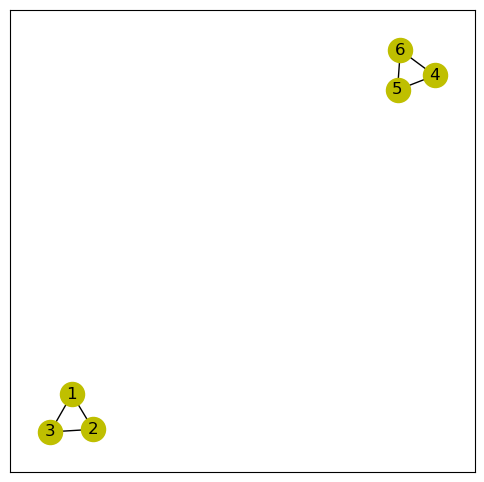

In [3]:
G=nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6, 4)])
plt.figure(figsize=(6, 6))
nx.draw_networkx(G, node_color='y')

The adjacency matrix of the graph can be obtained as follows: 

In [4]:
A = np.array(nx.adjacency_matrix(G).todense())
A

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 0]])

There are a couple of functions we will use. The first computes the Laplacian of a graph:

In [5]:
def laplacian(G):
    A = np.array(nx.adjacency_matrix(G).todense())
    L = np.diag(A.sum(axis=1)) - A
    return L

In [6]:
L = laplacian(G)
L

array([[ 2, -1, -1,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0],
       [-1, -1,  2,  0,  0,  0],
       [ 0,  0,  0,  2, -1, -1],
       [ 0,  0,  0, -1,  2, -1],
       [ 0,  0,  0, -1, -1,  2]])

The second function will compute and print eigenvalues of the Laplacian (ordered from the smallest to the largest) and the corresponding eigenvectors. The argument `k` in the function will let if specify how many smallest eigenvalues and their eigenvectors should be returned.

In [7]:
def eigens(L, k=None):
    vals, vects = np.linalg.eig(L)
    order = vals.argsort()
    vals = vals[order]
    vects = vects[:, order]
    vals = vals[:k]
    vects = vects[:, :k]
    
    with np.printoptions(precision=3, suppress=True):
        print(f"Eigenvalues of the Laplacian:\n{vals}")
        print(f"\nEigenvectors:\n{vects}")
    
    return vals, vects 

In [8]:
vals, vects = eigens(L)

Eigenvalues of the Laplacian:
[-0. -0.  3.  3.  3.  3.]

Eigenvectors:
[[-0.577  0.     0.816  0.254  0.     0.   ]
 [-0.577  0.    -0.408 -0.799  0.     0.   ]
 [-0.577  0.    -0.408  0.545  0.     0.   ]
 [ 0.    -0.577  0.     0.     0.816  0.254]
 [ 0.    -0.577  0.     0.    -0.408 -0.799]
 [ 0.    -0.577  0.     0.    -0.408  0.545]]


The Laplacian has two linearly independent eigenvectors corrsponding to the eigenvalue 0, since the graph has two connected components. The eigenvectors also show that the first vertices 1, 2 and 3 are in a different connected component that the vertices 4, 5 and 6. 

Next, we add an edge to the graph to make it connected:

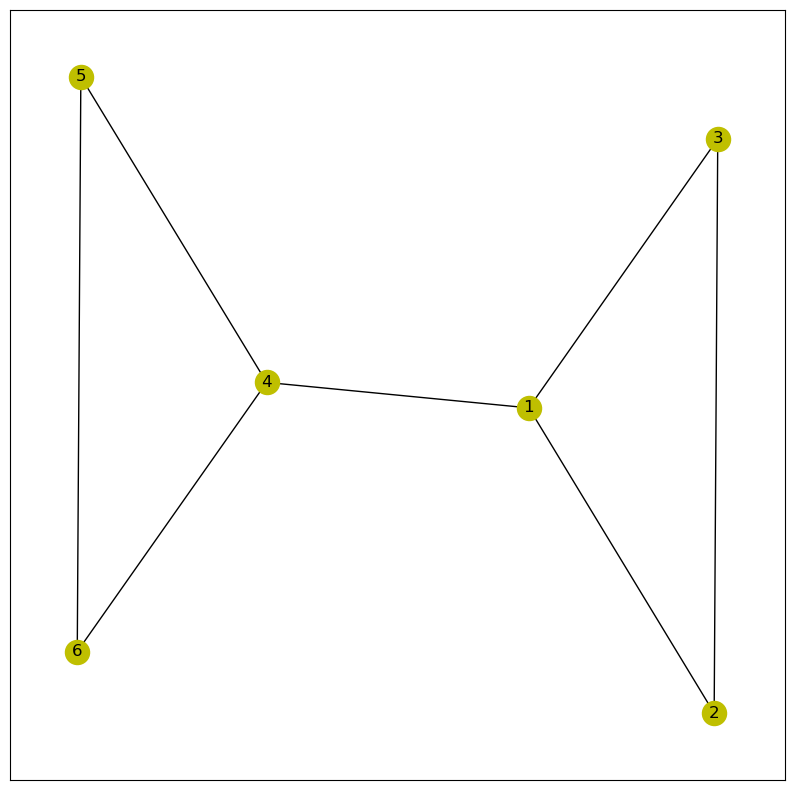

In [9]:
G.add_edge(1, 4)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, node_color='y')

We compute eigenvalues and eigenvectors of the Laplacian of the new graph:

In [10]:
L = laplacian(G)
vals, vects = eigens(L)

Eigenvalues of the Laplacian:
[0.    0.438 3.    3.    3.    4.562]

Eigenvectors:
[[-0.408  0.261  0.51  -0.227 -0.354  0.657]
 [-0.408  0.465 -0.578 -0.226 -0.367 -0.185]
 [-0.408  0.465  0.067  0.452  0.721 -0.185]
 [-0.408 -0.261  0.51  -0.227 -0.354 -0.657]
 [-0.408 -0.465 -0.329 -0.442  0.052  0.185]
 [-0.408 -0.465 -0.181  0.668  0.302  0.185]]


Since the graph is connected, there is now only one eigenvector corresponding to the eigenvalue 0. 
The eigenvector for the second smallest eigenvalue can be used for the spectral partitioning of the graph. It shows, for example, that if we would like to split the graph into two groups, with 3 vertices in each then we should put the vertices 1, 2, 3 in one group and the vertices 4, 5, 6 in the other. The formula

$$
| E(S, \bar{S})|
\geq 
\frac{|S||\bar{S}|}{N}
\cdot \lambda_2
$$

gives us an estimate how many edges will be cut by this split. Since in our case $|S| = |\bar S| = 3$, $N=6$ and $\lambda_2 = 0.438447$, the right hand side is: 

In [11]:
((3 * 3)/6)*vals[1]

0.6576707807867548

Thus $|E(S, \bar{S})| \geq 0.65$, so we need to split at least one edge to accomplish the split.

Below we repeat the computations to graph obtained by adding more edges to the graph: 

Add one more edge:

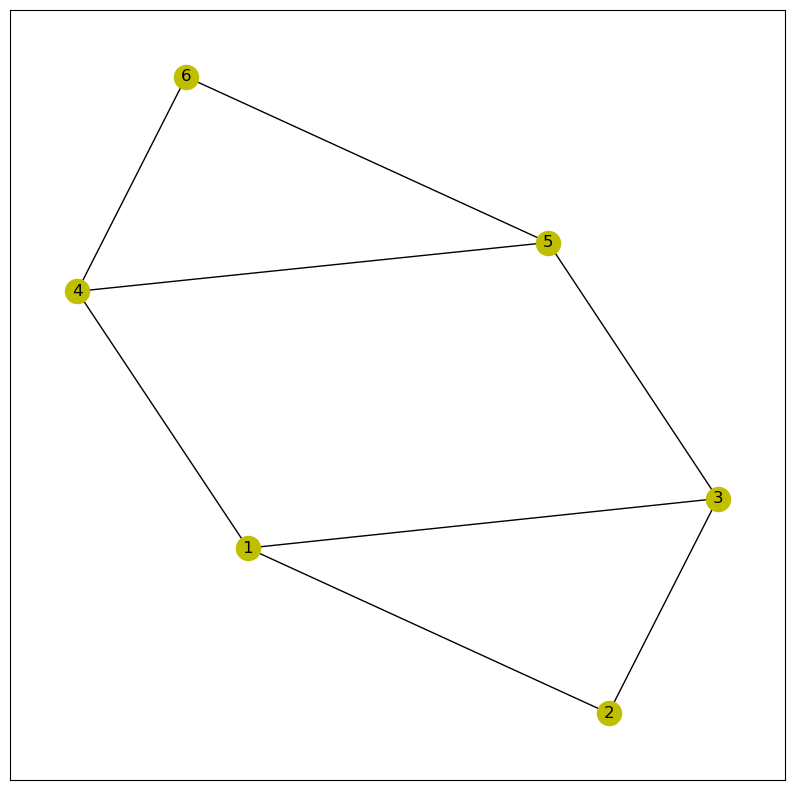

In [12]:
G.add_edge(3, 5)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, node_color='y')

In [13]:
L = laplacian(G)
vals, vects = eigens(L)

Eigenvalues of the Laplacian:
[0. 1. 3. 3. 4. 5.]

Eigenvectors:
[[-0.408 -0.289  0.577 -0.162 -0.408 -0.5  ]
 [-0.408 -0.577 -0.289  0.561  0.408 -0.   ]
 [-0.408 -0.289 -0.289 -0.399 -0.408  0.5  ]
 [-0.408  0.289  0.577 -0.162  0.408  0.5  ]
 [-0.408  0.289 -0.289 -0.399  0.408 -0.5  ]
 [-0.408  0.577 -0.289  0.561 -0.408  0.   ]]


One more edge:

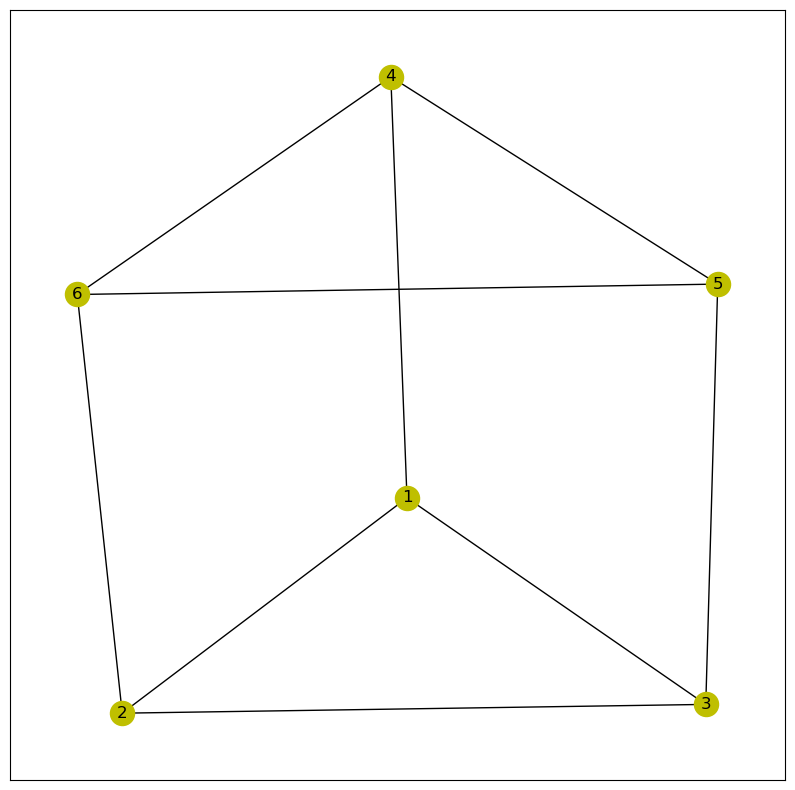

In [14]:
G.add_edge(2, 6)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, node_color='y')

In [15]:
L = laplacian(G)
vals, vects = eigens(L)

Eigenvalues of the Laplacian:
[-0.  2.  3.  3.  5.  5.]

Eigenvectors:
[[ 0.408  0.408 -0.577 -0.025  0.01  -0.577]
 [ 0.408  0.408  0.289  0.512 -0.505  0.289]
 [ 0.408  0.408  0.289 -0.487  0.495  0.289]
 [ 0.408 -0.408 -0.577 -0.025 -0.01   0.577]
 [ 0.408 -0.408  0.289 -0.487 -0.495 -0.289]
 [ 0.408 -0.408  0.289  0.512  0.505 -0.289]]


## [Zachary's Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

Zachary's Karate Club is one of the most frequently studied graphs in the network theory. It is built in the `networkx` library:

In [16]:
G = nx.karate_club_graph()

Here is a plot of this graph. Vertices represent members of a karate club, and edges represent social interactions between club members.

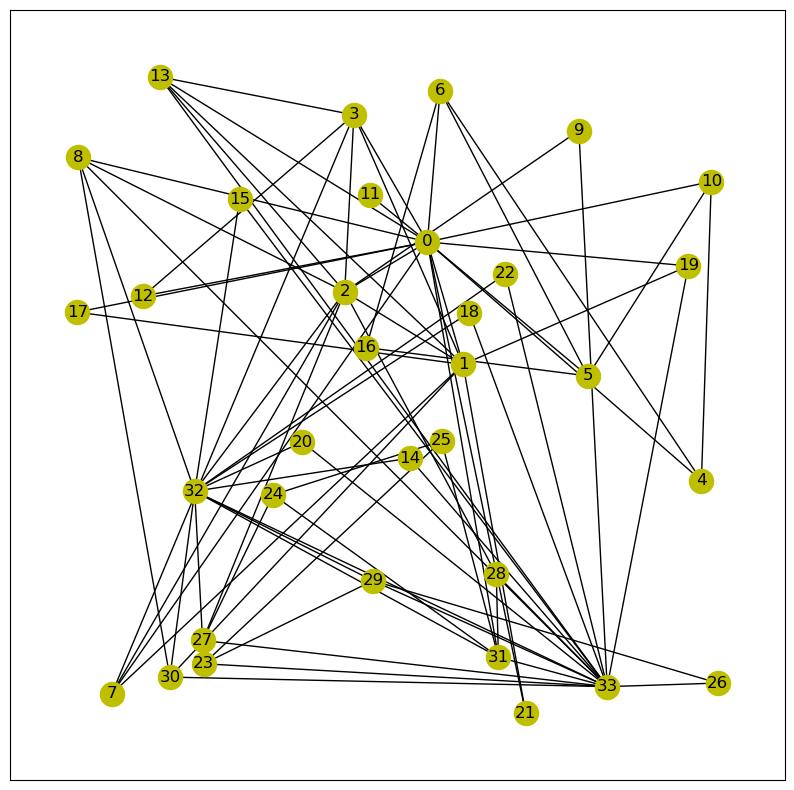

In [17]:
plt.figure(figsize=(10, 10))
rng = np.random.default_rng(0)
coords = rng.random((len(G.nodes), 2))
nx.draw_networkx(G, node_color='y', pos=nx.random_layout(G, seed=0))

After a conflict arose between two leaders of the club (nicknamed "Mr. Hi" and "Officer"), the club split into two clubs, one led by Mr. Hi and the other by Officer. The `networkx` graph provides information which member joined which of these new clubs: 

In [18]:
d = dict(G.nodes)
d

{0: {'club': 'Mr. Hi'},
 1: {'club': 'Mr. Hi'},
 2: {'club': 'Mr. Hi'},
 3: {'club': 'Mr. Hi'},
 4: {'club': 'Mr. Hi'},
 5: {'club': 'Mr. Hi'},
 6: {'club': 'Mr. Hi'},
 7: {'club': 'Mr. Hi'},
 8: {'club': 'Mr. Hi'},
 9: {'club': 'Officer'},
 10: {'club': 'Mr. Hi'},
 11: {'club': 'Mr. Hi'},
 12: {'club': 'Mr. Hi'},
 13: {'club': 'Mr. Hi'},
 14: {'club': 'Officer'},
 15: {'club': 'Officer'},
 16: {'club': 'Mr. Hi'},
 17: {'club': 'Mr. Hi'},
 18: {'club': 'Officer'},
 19: {'club': 'Mr. Hi'},
 20: {'club': 'Officer'},
 21: {'club': 'Mr. Hi'},
 22: {'club': 'Officer'},
 23: {'club': 'Officer'},
 24: {'club': 'Officer'},
 25: {'club': 'Officer'},
 26: {'club': 'Officer'},
 27: {'club': 'Officer'},
 28: {'club': 'Officer'},
 29: {'club': 'Officer'},
 30: {'club': 'Officer'},
 31: {'club': 'Officer'},
 32: {'club': 'Officer'},
 33: {'club': 'Officer'}}

Here is a graph of the club with colors indicating who joined which of the new clubs after the split (red for Officer, blue for Mr. Hi):

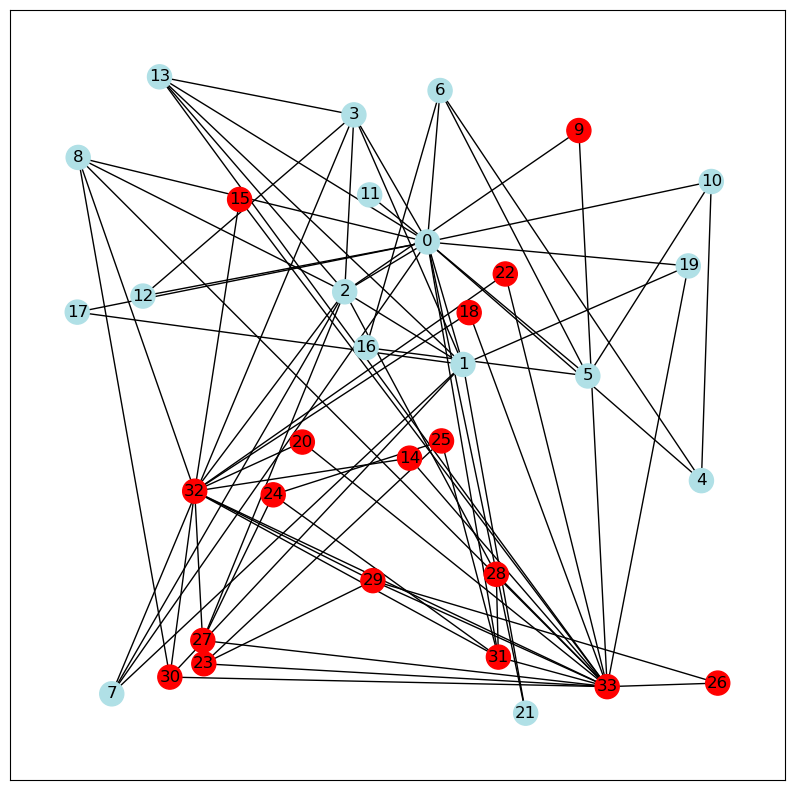

In [19]:
split = ['r' if d[k]['club'] == "Officer" else 'powderblue' for k in d]
plt.figure(figsize=(10, 10))
rng = np.random.default_rng(0)
coords = rng.random((len(G.nodes), 2))
nx.draw_networkx(G, node_color=split, pos=nx.random_layout(G, seed=0))

We will apply the spectral partitioning method to split Zachary's Karate Club graph into two pieces and see how closely these pieces align with the actual split of the club. For this, we will compute the second smallest eigenvalue of the Laplacian of the graph and its corresponding eigenvector. Then we will separate vertices, depending on whether they correspond to positive or negative entries of the eigenvector.

Here are the two smallest eigenvalues of the Laplacian and their eigenvectors:

In [20]:
L = laplacian(G)
vals, vects = eigens(L, k=2)

Eigenvalues of the Laplacian:
[0.    1.187]

Eigenvectors:
[[-0.171  0.123]
 [-0.171  0.058]
 [-0.171  0.014]
 [-0.171  0.074]
 [-0.171  0.267]
 [-0.171  0.299]
 [-0.171  0.297]
 [-0.171  0.064]
 [-0.171 -0.053]
 [-0.171 -0.129]
 [-0.171  0.286]
 [-0.171  0.204]
 [-0.171  0.123]
 [-0.171  0.035]
 [-0.171 -0.172]
 [-0.171 -0.155]
 [-0.171  0.372]
 [-0.171  0.168]
 [-0.171 -0.211]
 [-0.171  0.063]
 [-0.171 -0.188]
 [-0.171  0.129]
 [-0.171 -0.169]
 [-0.171 -0.148]
 [-0.171 -0.158]
 [-0.171 -0.146]
 [-0.171 -0.192]
 [-0.171 -0.13 ]
 [-0.171 -0.094]
 [-0.171 -0.17 ]
 [-0.171 -0.084]
 [-0.171 -0.117]
 [-0.171 -0.135]
 [-0.171 -0.124]]


Since the second eigenvalue is non-zero, we see that the graph is connected. Next, we split vertices into two groups "A" and "B", depending of the sign of the corresponding entry of the second eigenvector: 

In [21]:
spectral_cut = ["A" if k < 0 else "B"  for k in vects[:, 1]]
spectral_cut

['B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'B',
 'B',
 'A',
 'B',
 'A',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A']

Here is a comparison between the actual split and the split computed using the spectral partitioning method:

In [22]:
for i in d:
    print(f"{i:<4} {d[i]['club']:<10} {spectral_cut[i]:<5}")

0    Mr. Hi     B    
1    Mr. Hi     B    
2    Mr. Hi     B    
3    Mr. Hi     B    
4    Mr. Hi     B    
5    Mr. Hi     B    
6    Mr. Hi     B    
7    Mr. Hi     B    
8    Mr. Hi     A    
9    Officer    A    
10   Mr. Hi     B    
11   Mr. Hi     B    
12   Mr. Hi     B    
13   Mr. Hi     B    
14   Officer    A    
15   Officer    A    
16   Mr. Hi     B    
17   Mr. Hi     B    
18   Officer    A    
19   Mr. Hi     B    
20   Officer    A    
21   Mr. Hi     B    
22   Officer    A    
23   Officer    A    
24   Officer    A    
25   Officer    A    
26   Officer    A    
27   Officer    A    
28   Officer    A    
29   Officer    A    
30   Officer    A    
31   Officer    A    
32   Officer    A    
33   Officer    A    


It seems that the group "B" is close to the group "Mr. Hi" and "A" to "Officer. In the next printout we add one more column that we show `True` whenever these pair of labels coincide, and `False` otherwise:

In [23]:
for i in d:
    match = (((d[i]['club'] == 'Mr. Hi') and (spectral_cut[i] == "B")) or 
             ((d[i]['club'] == 'Officer') and (spectral_cut[i] == "A")))
    print(f"{i:<4} {d[i]['club']:<10} {spectral_cut[i]:<5} {match}")

0    Mr. Hi     B     True
1    Mr. Hi     B     True
2    Mr. Hi     B     True
3    Mr. Hi     B     True
4    Mr. Hi     B     True
5    Mr. Hi     B     True
6    Mr. Hi     B     True
7    Mr. Hi     B     True
8    Mr. Hi     A     False
9    Officer    A     True
10   Mr. Hi     B     True
11   Mr. Hi     B     True
12   Mr. Hi     B     True
13   Mr. Hi     B     True
14   Officer    A     True
15   Officer    A     True
16   Mr. Hi     B     True
17   Mr. Hi     B     True
18   Officer    A     True
19   Mr. Hi     B     True
20   Officer    A     True
21   Mr. Hi     B     True
22   Officer    A     True
23   Officer    A     True
24   Officer    A     True
25   Officer    A     True
26   Officer    A     True
27   Officer    A     True
28   Officer    A     True
29   Officer    A     True
30   Officer    A     True
31   Officer    A     True
32   Officer    A     True
33   Officer    A     True


Here is a plot of the graph showing side by side the actual split and the spectral cut split:

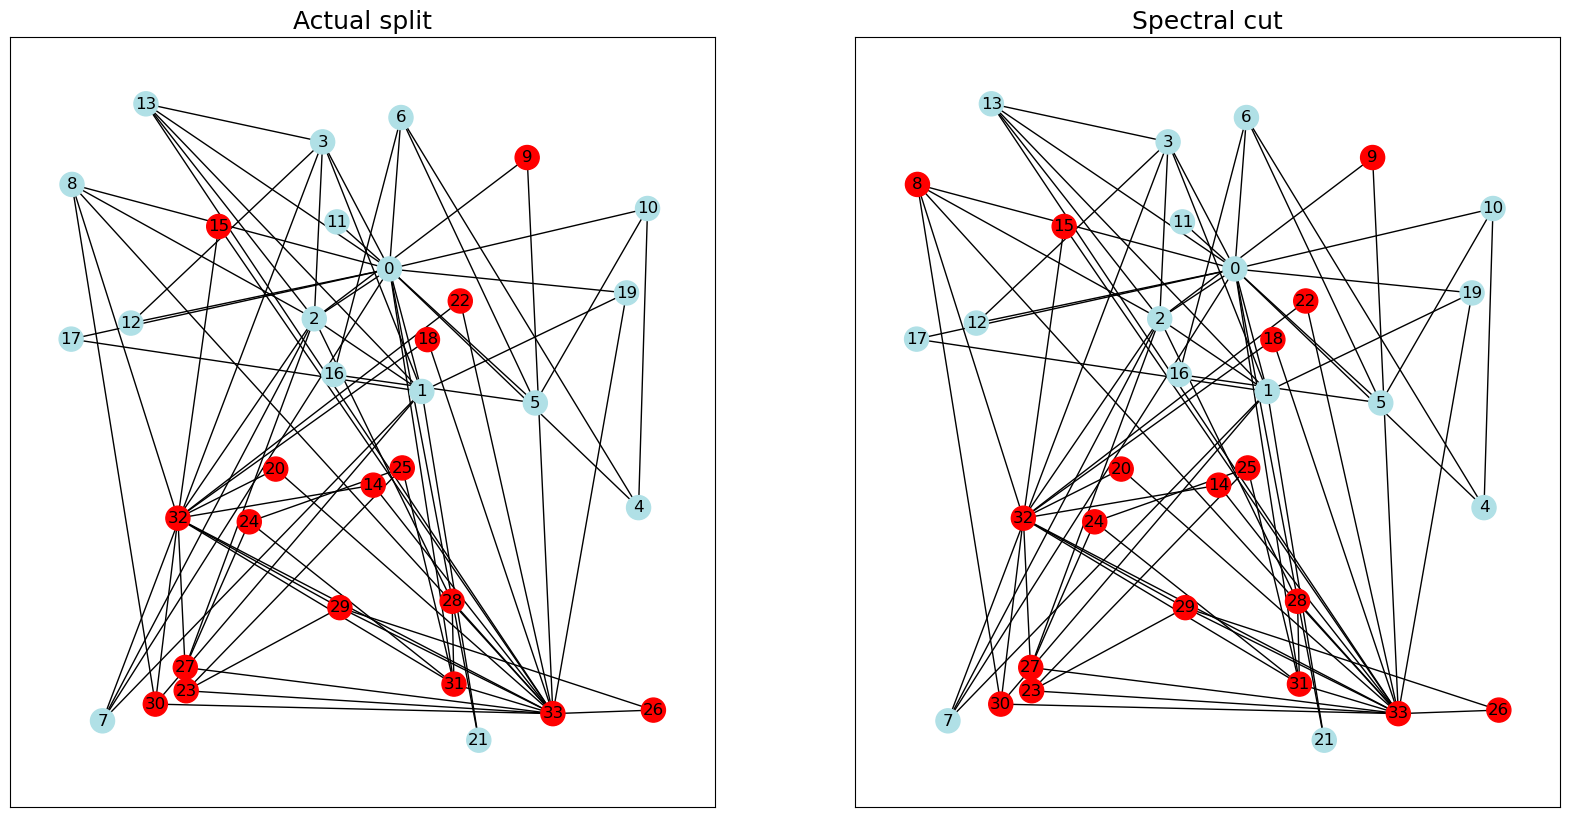

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title("Actual split", fontdict={'fontsize': 18})
split = ['r' if d[k]['club'] == "Officer" else 'powderblue' for k in d]
nx.draw_networkx(G, node_color=split, pos=nx.random_layout(G, seed=0))


plt.subplot(122)
plt.title("Spectral cut", fontdict={'fontsize': 18})
split = ['r' if c == "A" else 'powderblue' for c in spectral_cut]
nx.draw_networkx(G, node_color=split, pos=nx.random_layout(G, seed=0))

Here is the same plot as above, but with vertices placed so that they bettwer show the split:

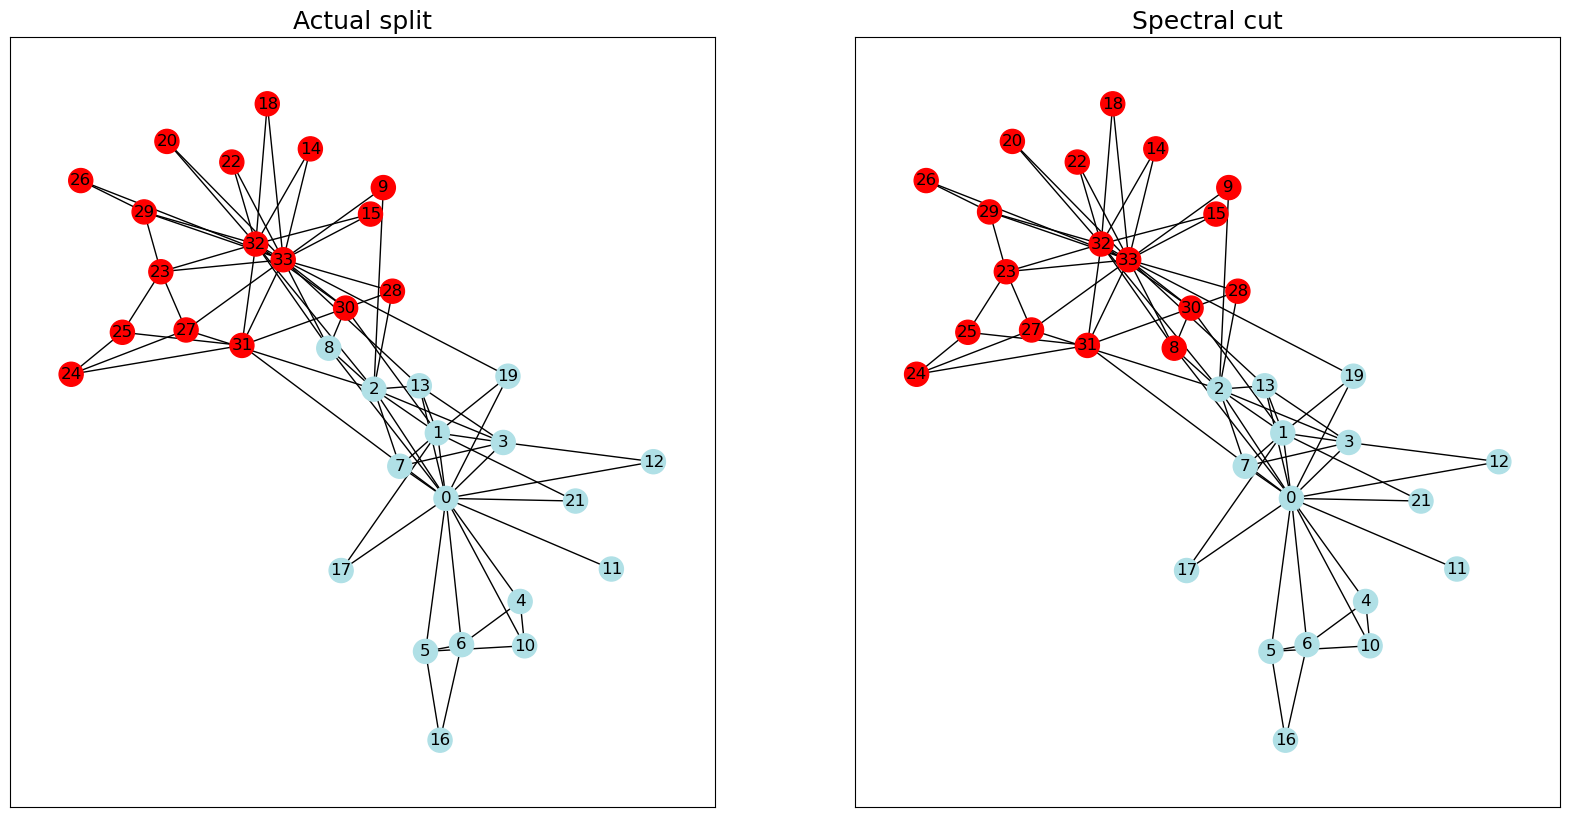

In [25]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title("Actual split", fontdict={'fontsize': 18})
split = ['r' if d[k]['club'] == "Officer" else 'powderblue' for k in d]
rng = np.random.default_rng(0)
coords = rng.random((len(G.nodes), 2))
nx.draw_networkx(G, node_color=split, pos=nx.spring_layout(G, pos={k: coords[k] for k in G.nodes}))


plt.subplot(122)
plt.title("Spectral cut", fontdict={'fontsize': 18})
split = ['r' if c == "A" else 'powderblue' for c in spectral_cut]
rng = np.random.default_rng(0)
coords = rng.random((len(G.nodes), 2))
nx.draw_networkx(G, node_color=split, pos=nx.spring_layout(G, pos={k: coords[k] for k in G.nodes}))